In [10]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [11]:
# Path of the file to read
suicide_filepath = "data/dataset2.csv"

# Read the file into a variable flight_data
suicide_data = pd.read_csv(suicide_filepath)
suicide_data.head()

,Unnamed: 0,text,class
0,1,oh my gosh,1.0
1,2,"trouble sleeping, confused mind, restless hear...",1.0
2,3,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,4,I've shifted my focus to something else but I'...,1.0
4,5,"I'm restless and restless, it's been a month n...",1.0


In [12]:
suicide_data = suicide_data.drop('Unnamed: 0', axis=1)
suicide_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6982 entries, 0 to 6981
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    6982 non-null   object 
 1   class   6980 non-null   float64
dtypes: float64(1), object(1)
memory usage: 109.2+ KB


In [13]:
suicide_data['Length'] = suicide_data['text'].apply(lambda x: len(x.split(' ')))
suicide_data = suicide_data[suicide_data.Length<=317]

Text(0.5, 1.0, 'Number of suicides per the dataset')

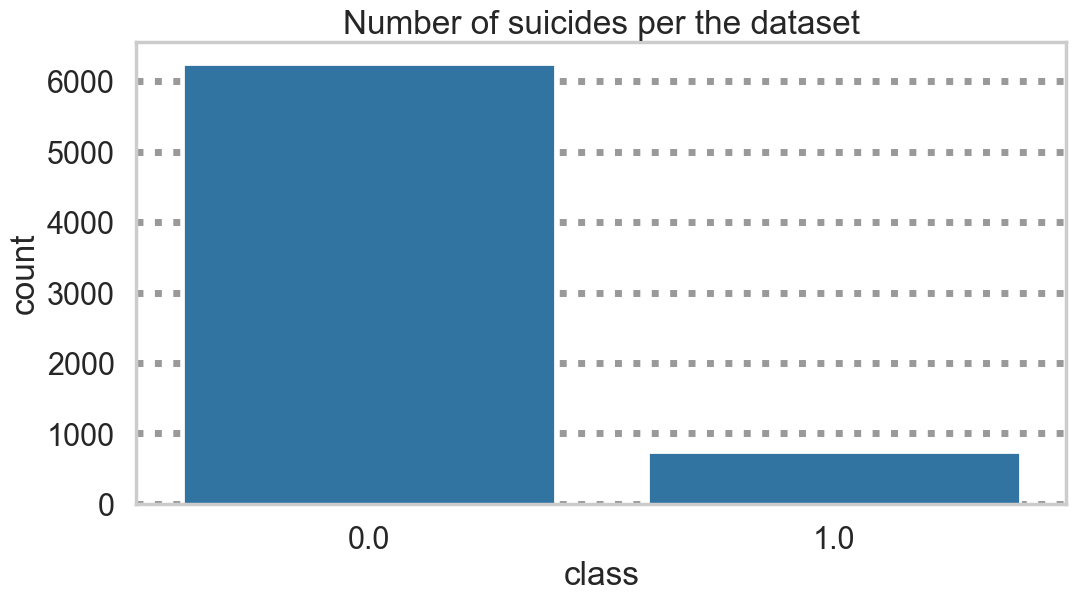

In [14]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 5})
sns.countplot(x = 'class' , data=suicide_data)

plt.title('Number of suicides per the dataset')




In [15]:
Words = list()
for i in suicide_data['text']:
    for j in i.split(' '):
        Words.append(j.upper())
len(Words)

88541

In [16]:
from collections import Counter
Words_Freq = Counter(Words)
Words_Freq = pd.DataFrame({'Word':list(Words_Freq.keys()),'Frequency':list(Words_Freq.values())})
Words_Freq.sort_values('Frequency',ascending=False,inplace=True)
Words_Freq.head(70)
len(Words_Freq)

16957

In [17]:
Words_Freq = Words_Freq[Words_Freq['Frequency']>Words_Freq['Frequency'].quantile(0.99)]
len(Words_Freq)


167

In [18]:
Words_Freq = Words_Freq[Words_Freq['Frequency'] < 31905]
Words_Freq.head()

,Word,Frequency
51,THE,2804
27,TO,2533
53,I,1960
50,IS,1678
42,YOU,1526
